In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
import seaborn as sns
sns.set()

In [6]:
train=pd.read_csv('titanic_train_co.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


i will creat a simple heatmap to check missing data

# Explore the data

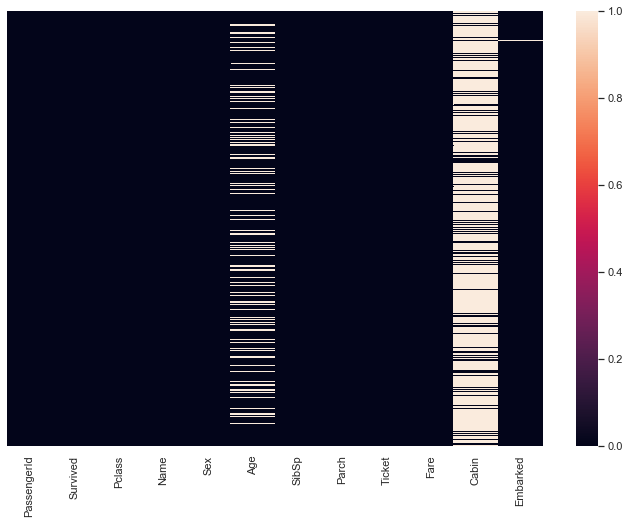

In [12]:
sns.heatmap(train.isnull(),yticklabels=False)

It shows us the 'Age' and 'Cabin' column contain too much missing value and other don't have any.\
I have to drop the 'Cabin' column but i will put some effort on 'Age' column.

Let's check the 'Survived' column
it's easy, those are survive are call by 1 

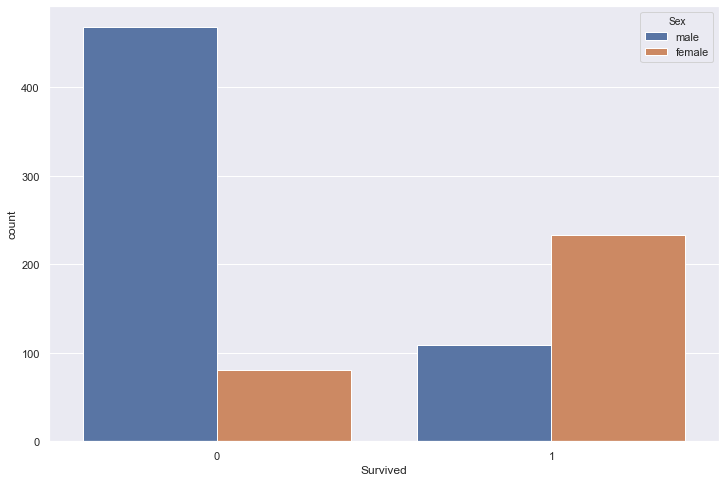

In [14]:
sns.countplot(x='Survived',data=train,hue='Sex')

It's look like, Male doesn't have that much luck on survive.


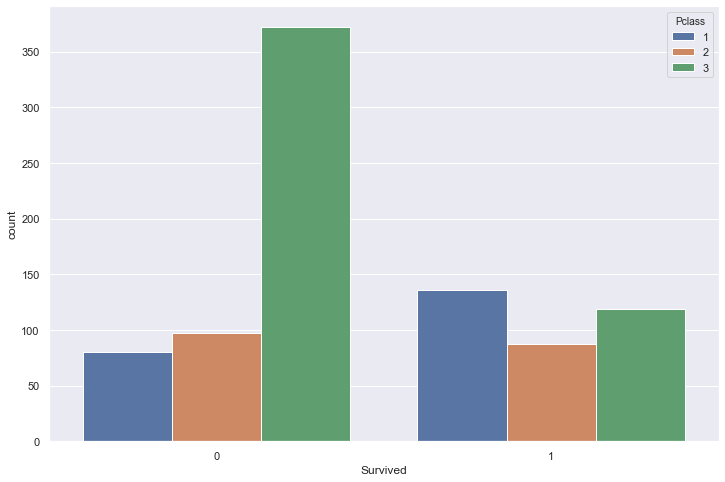

In [15]:
sns.countplot(x='Survived',data=train,hue='Pclass')

Those passengers are belong to third class. did not survive that much.\
I have personal explanation, maybe those are worker and they were trying to turn the ship and boosting it up by feeding coal. and as they were lower section of the ship ,did not get enough chance to go upper deck to join evacutation.

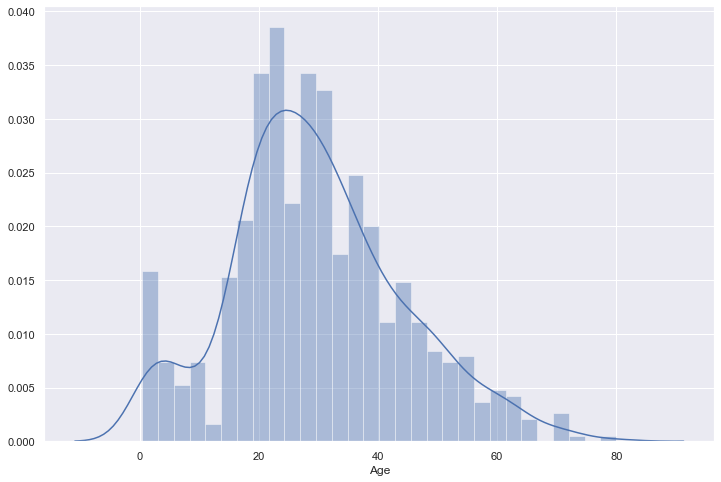

In [19]:
sns.distplot(train['Age'],bins=30)

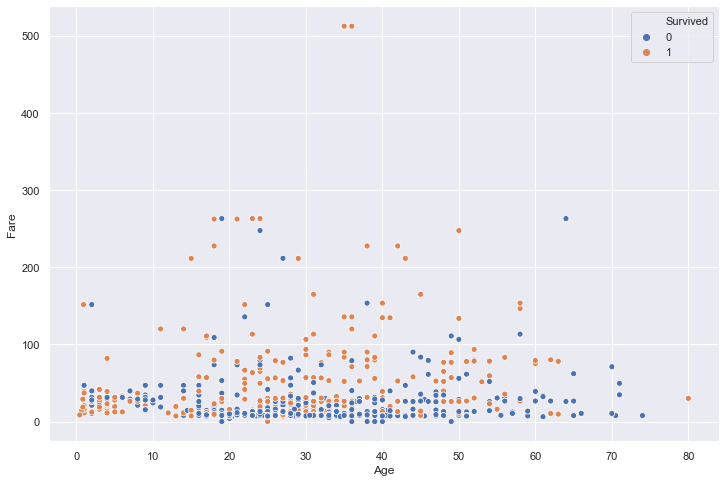

In [39]:
sns.scatterplot(x='Age',y='Fare',data=train,hue='Survived')

It's a optional plot just to compare the age vs fair with survive.
most of the passengers brought ticket of cost under 100. 

Yep that rich couple survive.

# Data Cleaning

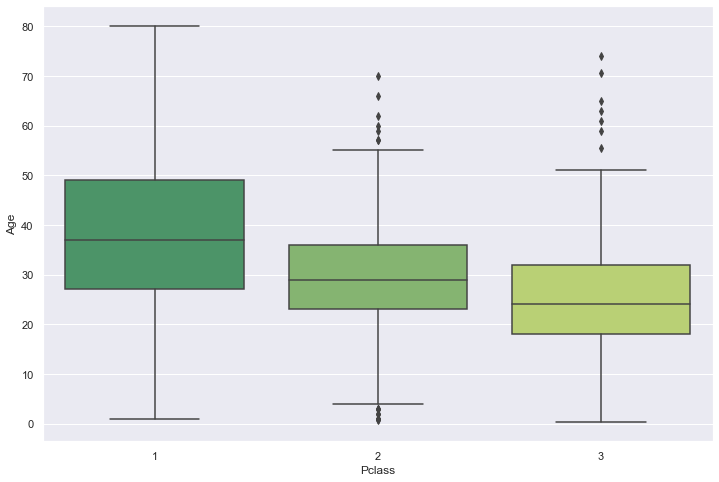

In [42]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

the wealthier passengers in the higher classes tend to be older, which makes sense.\
I will use these average age values to impute based on Pclass for Age.

In [50]:
print('The Avg age of 1st class passengers: {}'.format(train[train['Pclass']==1]['Age'].mean()))
print('The Avg age of 2nd class passengers: {}'.format(train[train['Pclass']==2]['Age'].mean()))
print('The Avg age of 3rd class passengers: {}'.format(train[train['Pclass']==3]['Age'].mean()))

The Avg age of 1st class passengers: 38.233440860215055
The Avg age of 2nd class passengers: 29.87763005780347
The Avg age of 3rd class passengers: 25.14061971830986


In [51]:
def age(columns):
    Age=columns[0]
    Pclass=columns[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

Now apply this function on 'Age' column to fill those missing value

In [52]:
train['Age']=train[['Age','Pclass']].apply(age,axis=1)

let's check that heatmap again

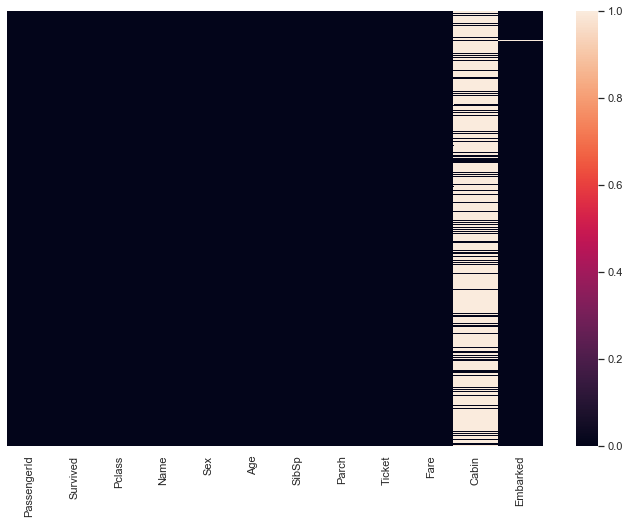

In [54]:
sns.heatmap(train.isnull(),yticklabels=False)

let's drop that 'Cabin' column.

In [55]:
train.drop('Cabin',axis=1,inplace=True)

for getting 100% sure.

In [56]:
train.dropna(inplace=True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Preprocessing

I will need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [58]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [59]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [62]:
train = pd.concat([train,sex,embark],axis=1)

In [63]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Creat the Model.

In [69]:
X=train.drop('Survived',axis=1)
y=train['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [74]:
reg.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
pre=reg.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [82]:
accuracy_score(y_test,pre)

0.848314606741573

In [84]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.81      0.82      0.82        73

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [85]:
confusion_matrix(y_test,pre)

array([[91, 14],
       [13, 60]], dtype=int64)

# Not bad my model works on 84% accuracy

Now let's set up the test dataset

In [87]:
titanic_test=pd.read_csv('preprocessed_titanic_test.csv')

In [92]:
titanic_test.head()


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


yes i cleaned the dataset same as i cleaned here , i just didn't show the process to avoid the complexity

In [89]:
titanic_test.isnull().sum() 
#no heatmap now

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [93]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    int64  
 6   Q       417 non-null    int64  
 7   S       417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


Now make prediction

In [95]:
titanic_test['Survived']=reg.predict(titanic_test)

In [98]:
titanic_test.head(30)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1
5,3,14.0,0,0,9.2250,1,0,1,0
6,3,30.0,0,0,7.6292,0,1,0,1
7,2,26.0,1,1,29.0000,1,0,1,0
8,3,18.0,0,0,7.2292,0,0,0,1
9,3,21.0,2,0,24.1500,1,0,1,0


# Done